In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

# Entendimiento de los datos

In [118]:
data = pd.read_csv('tipo2_entrenamiento_estudiantes.csv')
data

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [119]:
data.shape

(7875, 2)

<AxesSubplot: ylabel='Class'>

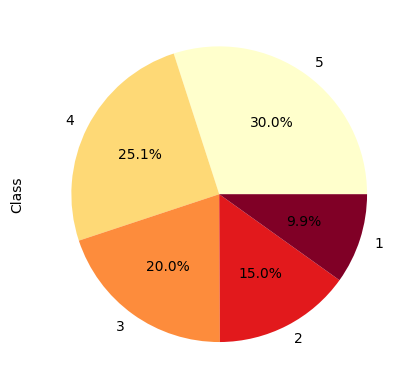

In [120]:
data["Class"].value_counts().plot(kind='pie', colormap="YlOrRd", autopct='%1.1f%%')

# Creacion del modelo

In [121]:
data_train, data_test = train_test_split(data, test_size=0.2)
y_train, y_test = data_train["Class"], data_test["Class"]

In [122]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5)
X_train = vectorizer.fit_transform(data_train["Review"])
X_test = vectorizer.transform(data_test["Review"])

In [123]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)

RidgeClassifier(solver='sparse_cg', tol=0.01)

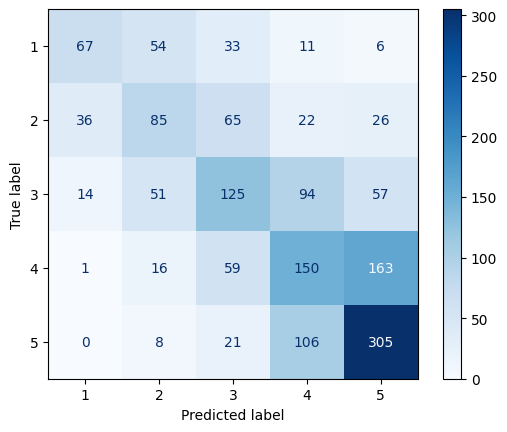

In [124]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_test)

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)


In [125]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Precision: ", precision_score(y_test, pred, average='weighted'))
print("Recall: ", recall_score(y_test, pred, average='weighted'))
print("F1: ", f1_score(y_test, pred, average='weighted'))
print("Accuracy: ", accuracy_score(y_test, pred))


Precision:  0.45968073358224915
Recall:  0.46476190476190476
F1:  0.4576705031516866
Accuracy:  0.46476190476190476
